In [1]:
import gym
import gym_maze
import numpy as np
import time
import matplotlib.pyplot as plt
from matplotlib.table import Table
from matplotlib.patches import Polygon
import matplotlib.image as mpimg

In [2]:
# Create an environment
env = gym.make("maze-random-10x10-plus-v0")
observation = env.reset()

In [3]:
def exploration_exploitation(state, epsilon, q_table):
    random = np.random.rand()
    if random < epsilon: # exploitation
        action = env.action_space.sample()
    else: # explotation
        x, y = state
        action = np.argmax(q_table[int(x), int(y), :])
    return action

In [4]:
def update_q_table(q_table, cur_state, action, next_state, reward, alpha, gamma):
    cur_x, cur_y = cur_state
    next_x, next_y = next_state
    # Q(S, A) <- (1 - α) Q(S, A) + [α * (r + (γ * max(Q(S', A*))))]
    sample = reward + (gamma * np.max(q_table[next_x, next_y, :])) 
    q_table[int(cur_x), int(cur_y), action] += alpha * (sample - q_table[int(cur_x), int(cur_y), action])

In [17]:
def q_learning(num_episodes, q_table, epsilon, alpha, gamma, render_mode = False):

    actions = np.zeros((env.maze_size[0], env.maze_size[1]))
    
    episode_steps = []
    episode_rewards = []
    
    limit_steps = 5000

    for i in range(num_episodes):
        
        # start from the initial state
        cur_state = env.reset()
        game_over = False

        num_actions = 0
        total_reward = 0
        
        while not game_over:

            env.render()
            # time.sleep(0.05)
            
#             if num_actions > limit_steps:
#                 break

            # choose an action
            action = exploration_exploitation(cur_state, epsilon, q_table)
            if epsilon > 0 and num_actions != 0:
                epsilon -= ((0.001) / (num_actions))  
            elif num_actions != 0:
                epsilon = 0
                
            num_actions += 1

            # Perform the action and receive feedback from the environment
            next_state, reward, done, truncated = env.step(action)
                
            if truncated:
                break

            if done:
                game_over = True

            else:
                total_reward += reward

            # update Q_table
            update_q_table(q_table, cur_state, action, next_state, reward, alpha, gamma)
            
            episode_steps.append(num_actions)
            episode_rewards.append(total_reward)

            # update state
            cur_state = next_state
        
        print("episode:", i, "  steps:", num_actions, "  reward:", total_reward, "  epsilon:", epsilon)

    return q_table, actions, episode_steps, episode_rewards

In [19]:
num_actions = env.action_space.n
num_row = env.maze_size[0]
num_column = env.maze_size[1]

# initialize Q-Table
Q_table = np.zeros((num_row, num_column, num_actions))


# Define the maximum number of iterations
NUM_EPISODES = 1000
# Define explroration explotation trade-off
epsilon = 1
# Define learning rate
alpha = 0.09
# Define discount factor
gamma = 0.99

# Q-Learning Algorithm
q_table, actions, episode_steps, episode_rewards = q_learning(NUM_EPISODES, Q_table, epsilon, alpha, gamma)

episode: 0   steps: 360   reward: -0.35900000000000026   epsilon: 0.993538069835541
episode: 1   steps: 1465   reward: -1.4639999999999496   epsilon: 0.9856715849849452
episode: 2   steps: 309   reward: -0.3080000000000002   epsilon: 0.9793626470388963
episode: 3   steps: 289   reward: -0.2880000000000002   epsilon: 0.9731207357874404
episode: 4   steps: 764   reward: -0.7630000000000006   epsilon: 0.9659056069264028
episode: 5   steps: 44   reward: -0.04300000000000003   epsilon: 0.9615556083058009
episode: 6   steps: 1415   reward: -1.413999999999955   epsilon: 0.9537238612293333
episode: 7   steps: 249   reward: -0.2480000000000002   epsilon: 0.9476312020441577
episode: 8   steps: 68   reward: -0.06700000000000005   epsilon: 0.9428418496367813
episode: 9   steps: 1836   reward: -1.8349999999999087   epsilon: 0.934749561756577
episode: 10   steps: 1440   reward: -1.4389999999999523   epsilon: 0.9269002949615158
episode: 11   steps: 19   reward: -0.01800000000000001   epsilon: 0.92340

episode: 102   steps: 2045   reward: -2.043999999999886   epsilon: 0.35684473644610193
episode: 103   steps: 10733   reward: -10.731999999999491   epsilon: 0.34698648898074314
episode: 104   steps: 5626   reward: -5.625000000000213   epsilon: 0.33777420820251597
episode: 105   steps: 291   reward: -0.2900000000000002   epsilon: 0.3315253884675852
episode: 106   steps: 179   reward: -0.17800000000000013   epsilon: 0.3257635828937581
episode: 107   steps: 4851   reward: -4.849999999999954   epsilon: 0.3166995301556861
episode: 108   steps: 428   reward: -0.4270000000000003   epsilon: 0.3100643599744173
episode: 109   steps: 6947   reward: -6.946000000000654   epsilon: 0.3006411510940652
episode: 110   steps: 617   reward: -0.6160000000000004   epsilon: 0.29363987699693056
episode: 111   steps: 2029   reward: -2.0279999999998877   epsilon: 0.2854476094392567
episode: 112   steps: 224   reward: -0.22300000000000017   epsilon: 0.2794609815261741
episode: 113   steps: 5465   reward: -5.46400

episode: 208   steps: 1632   reward: -1.6309999999999312   epsilon: 0
episode: 209   steps: 1827   reward: -1.8259999999999097   epsilon: 0
episode: 210   steps: 683   reward: -0.6820000000000005   epsilon: 0
episode: 211   steps: 7   reward: -0.006   epsilon: 0
episode: 212   steps: 33   reward: -0.03200000000000002   epsilon: 0
episode: 213   steps: 70   reward: -0.06900000000000005   epsilon: 0
episode: 214   steps: 1616   reward: -1.614999999999933   epsilon: 0
episode: 215   steps: 1140   reward: -1.1389999999999854   epsilon: 0
episode: 216   steps: 2208   reward: -2.206999999999868   epsilon: 0
episode: 217   steps: 7380   reward: -7.379000000000799   epsilon: 0
episode: 218   steps: 4512   reward: -4.510999999999841   epsilon: 0
episode: 219   steps: 1540   reward: -1.5389999999999413   epsilon: 0
episode: 220   steps: 2101   reward: -2.0999999999998797   epsilon: 0
episode: 221   steps: 4470   reward: -4.468999999999827   epsilon: 0
episode: 222   steps: 124   reward: -0.12300

episode: 329   steps: 6215   reward: -6.21400000000041   epsilon: 0
episode: 330   steps: 35   reward: -0.03400000000000002   epsilon: 0
episode: 331   steps: 228   reward: -0.22700000000000017   epsilon: 0
episode: 332   steps: 1983   reward: -1.9819999999998925   epsilon: 0
episode: 333   steps: 567   reward: -0.5660000000000004   epsilon: 0
episode: 334   steps: 843   reward: -0.8420000000000006   epsilon: 0
episode: 335   steps: 1680   reward: -1.6789999999999259   epsilon: 0
episode: 336   steps: 955   reward: -0.9540000000000007   epsilon: 0
episode: 337   steps: 2097   reward: -2.09599999999988   epsilon: 0
episode: 338   steps: 2742   reward: -2.740999999999809   epsilon: 0
episode: 339   steps: 5725   reward: -5.724000000000246   epsilon: 0
episode: 340   steps: 16   reward: -0.015000000000000006   epsilon: 0
episode: 341   steps: 1043   reward: -1.041999999999996   epsilon: 0
episode: 342   steps: 3163   reward: -3.161999999999763   epsilon: 0
episode: 343   steps: 98   rewar

episode: 457   steps: 1875   reward: -1.8739999999999044   epsilon: 0
episode: 458   steps: 240   reward: -0.23900000000000018   epsilon: 0
episode: 459   steps: 1985   reward: -1.9839999999998923   epsilon: 0
episode: 460   steps: 763   reward: -0.7620000000000006   epsilon: 0
episode: 461   steps: 63   reward: -0.06200000000000005   epsilon: 0
episode: 462   steps: 843   reward: -0.8420000000000006   epsilon: 0
episode: 463   steps: 17   reward: -0.016000000000000007   epsilon: 0
episode: 464   steps: 1616   reward: -1.614999999999933   epsilon: 0
episode: 465   steps: 2871   reward: -2.869999999999795   epsilon: 0
episode: 466   steps: 820   reward: -0.8190000000000006   epsilon: 0
episode: 467   steps: 437   reward: -0.43600000000000033   epsilon: 0
episode: 468   steps: 49   reward: -0.048000000000000036   epsilon: 0
episode: 469   steps: 82   reward: -0.08100000000000006   epsilon: 0
episode: 470   steps: 506   reward: -0.5050000000000003   epsilon: 0
episode: 471   steps: 74   r

episode: 576   steps: 3392   reward: -3.3909999999997376   epsilon: 0
episode: 577   steps: 8300   reward: -8.29900000000084   epsilon: 0
episode: 578   steps: 1169   reward: -1.1679999999999822   epsilon: 0
episode: 579   steps: 2935   reward: -2.933999999999788   epsilon: 0
episode: 580   steps: 960   reward: -0.9590000000000007   epsilon: 0
episode: 581   steps: 9084   reward: -9.083000000000405   epsilon: 0
episode: 582   steps: 202   reward: -0.20100000000000015   epsilon: 0
episode: 583   steps: 246   reward: -0.2450000000000002   epsilon: 0
episode: 584   steps: 3563   reward: -3.5619999999997187   epsilon: 0
episode: 585   steps: 21   reward: -0.02000000000000001   epsilon: 0
episode: 586   steps: 359   reward: -0.35800000000000026   epsilon: 0
episode: 587   steps: 2816   reward: -2.814999999999801   epsilon: 0
episode: 588   steps: 618   reward: -0.6170000000000004   epsilon: 0
episode: 589   steps: 6145   reward: -6.1440000000003865   epsilon: 0
episode: 590   steps: 465   r

episode: 700   steps: 1846   reward: -1.8449999999999076   epsilon: 0
episode: 701   steps: 87   reward: -0.08600000000000006   epsilon: 0
episode: 702   steps: 158   reward: -0.1570000000000001   epsilon: 0
episode: 703   steps: 41   reward: -0.04000000000000003   epsilon: 0
episode: 704   steps: 271   reward: -0.2700000000000002   epsilon: 0
episode: 705   steps: 3258   reward: -3.2569999999997523   epsilon: 0
episode: 706   steps: 167   reward: -0.16600000000000012   epsilon: 0
episode: 707   steps: 26   reward: -0.025000000000000015   epsilon: 0
episode: 708   steps: 33   reward: -0.03200000000000002   epsilon: 0
episode: 709   steps: 535   reward: -0.5340000000000004   epsilon: 0
episode: 710   steps: 422   reward: -0.4210000000000003   epsilon: 0
episode: 711   steps: 13067   reward: -13.065999999998198   epsilon: 0
episode: 712   steps: 1784   reward: -1.7829999999999144   epsilon: 0
episode: 713   steps: 433   reward: -0.43200000000000033   epsilon: 0
episode: 714   steps: 13  

episode: 823   steps: 12381   reward: -12.379999999998578   epsilon: 0
episode: 824   steps: 203   reward: -0.20200000000000015   epsilon: 0
episode: 825   steps: 3883   reward: -3.8819999999996835   epsilon: 0
episode: 826   steps: 3016   reward: -3.014999999999779   epsilon: 0
episode: 827   steps: 158   reward: -0.1570000000000001   epsilon: 0
episode: 828   steps: 2502   reward: -2.5009999999998356   epsilon: 0
episode: 829   steps: 347   reward: -0.34600000000000025   epsilon: 0
episode: 830   steps: 1692   reward: -1.6909999999999246   epsilon: 0
episode: 831   steps: 5084   reward: -5.083000000000032   epsilon: 0
episode: 832   steps: 95   reward: -0.09400000000000007   epsilon: 0
episode: 833   steps: 3840   reward: -3.838999999999688   epsilon: 0
episode: 834   steps: 5345   reward: -5.344000000000119   epsilon: 0
episode: 835   steps: 6286   reward: -6.285000000000434   epsilon: 0
episode: 836   steps: 4631   reward: -4.629999999999881   epsilon: 0
episode: 837   steps: 462  

episode: 943   steps: 2658   reward: -2.6569999999998184   epsilon: 0
episode: 944   steps: 741   reward: -0.7400000000000005   epsilon: 0
episode: 945   steps: 94   reward: -0.09300000000000007   epsilon: 0
episode: 946   steps: 903   reward: -0.9020000000000007   epsilon: 0
episode: 947   steps: 20   reward: -0.01900000000000001   epsilon: 0
episode: 948   steps: 55   reward: -0.05400000000000004   epsilon: 0
episode: 949   steps: 71   reward: -0.07000000000000005   epsilon: 0
episode: 950   steps: 647   reward: -0.6460000000000005   epsilon: 0
episode: 951   steps: 2326   reward: -2.324999999999855   epsilon: 0
episode: 952   steps: 775   reward: -0.7740000000000006   epsilon: 0
episode: 953   steps: 422   reward: -0.4210000000000003   epsilon: 0
episode: 954   steps: 139   reward: -0.1380000000000001   epsilon: 0
episode: 955   steps: 9   reward: -0.008   epsilon: 0
episode: 956   steps: 157   reward: -0.1560000000000001   epsilon: 0
episode: 957   steps: 196   reward: -0.195000000

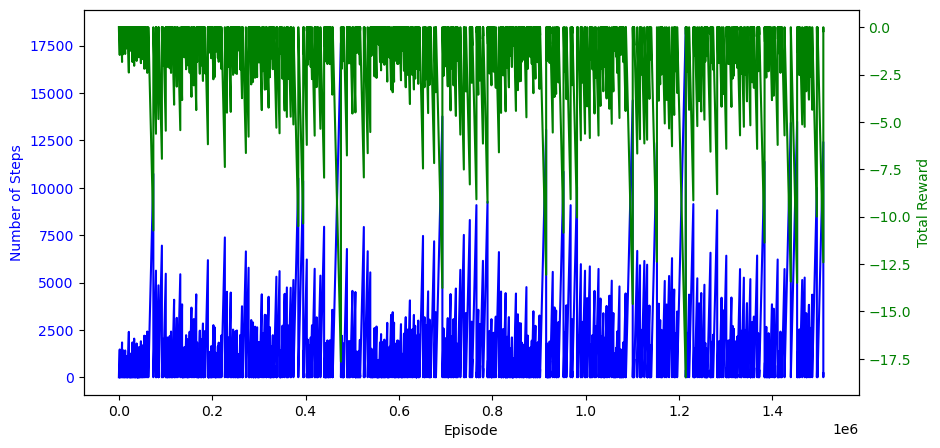

In [20]:
fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()

ax1.plot(episode_steps, label='Steps', color='blue')
ax1.set_xlabel('Episode')
ax1.set_ylabel('Number of Steps', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2.plot(episode_rewards, label='Total Reward', color='green')
ax2.set_ylabel('Total Reward', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.show()

In [21]:
def show_q_table(q_table):
    rows, cols = q_table.shape[:2]

    fig, ax_array = plt.subplots(rows, cols, figsize=(cols, rows))
    plt.subplots_adjust(wspace=0.1, hspace=0.1)

    for i in range(rows):
        for j in range(cols):
            values = q_table[i, j, :]
            ax = ax_array[i, j]

            center = (0.5, 0.5)
            triangle1 = Polygon([
                [center[0] - 0.5, center[1] + 0.5],
                [center[0] + 0.5, center[1] + 0.5],
                [center[0], center[1]],
            ], closed=True, edgecolor='black', facecolor='none')

            triangle2 = Polygon([
                [center[0] - 0.5, center[1] + 0.5],
                [center[0] - 0.5, center[1] - 0.5],
                [center[0], center[1]],
            ], closed=True, edgecolor='black', facecolor='none')

            triangle3 = Polygon([
                [center[0] - 0.5, center[1] - 0.5],
                [center[0] + 0.5, center[1] - 0.5],
                [center[0], center[1]],
            ], closed=True, edgecolor='black', facecolor='none')

            triangle4 = Polygon([
                [center[0] + 0.5, center[1] - 0.5],
                [center[0] + 0.5, center[1] + 0.5],
                [center[0], center[1]],
            ], closed=True, edgecolor='black', facecolor='none')

            ax.text(center[0], center[1] + 0.25, f'{values[0]:.4f}', ha='center', va='center', fontsize=6)
            ax.text(center[0], center[1] - 0.25, f'{values[1]:.4f}', ha='center', va='center', fontsize=6)
            ax.text(center[0] + 0.25, center[1], f'{values[2]:.4f}', ha='center', va='center', fontsize=6)
            ax.text(center[0] - 0.25, center[1], f'{values[3]:.4f}', ha='center', va='center', fontsize=6)

            ax.add_patch(triangle1)
            ax.add_patch(triangle2)
            ax.add_patch(triangle3)
            ax.add_patch(triangle4)

            ax.set_xlim(0, 1)
            ax.set_ylim(0, 1)
            ax.axis('off')

    plt.tight_layout()
    plt.show()

In [22]:
def show_actions(actions, ax):
    actions = actions.astype(int)

    table = ax.table(cellText=actions, loc='center', cellLoc='center', edges='open')
    ax.axis('off')

    for i in range(actions.shape[0]):
        for j in range(actions.shape[1]):
            value = actions[i, j]
            if value == 0:
                arrow = u'$\u2191$'   # Up arrow
            elif value == 1:
                arrow = u'$\u2193$'   # Down arrow
            elif value == 2:
                arrow = u'$\u2192$'   # Right arrow
            elif value == 3:
                arrow = u'$\u2190$'   # Left arrow
            else:
                arrow = ''
        
            table[i, j].get_text().set_text(arrow)

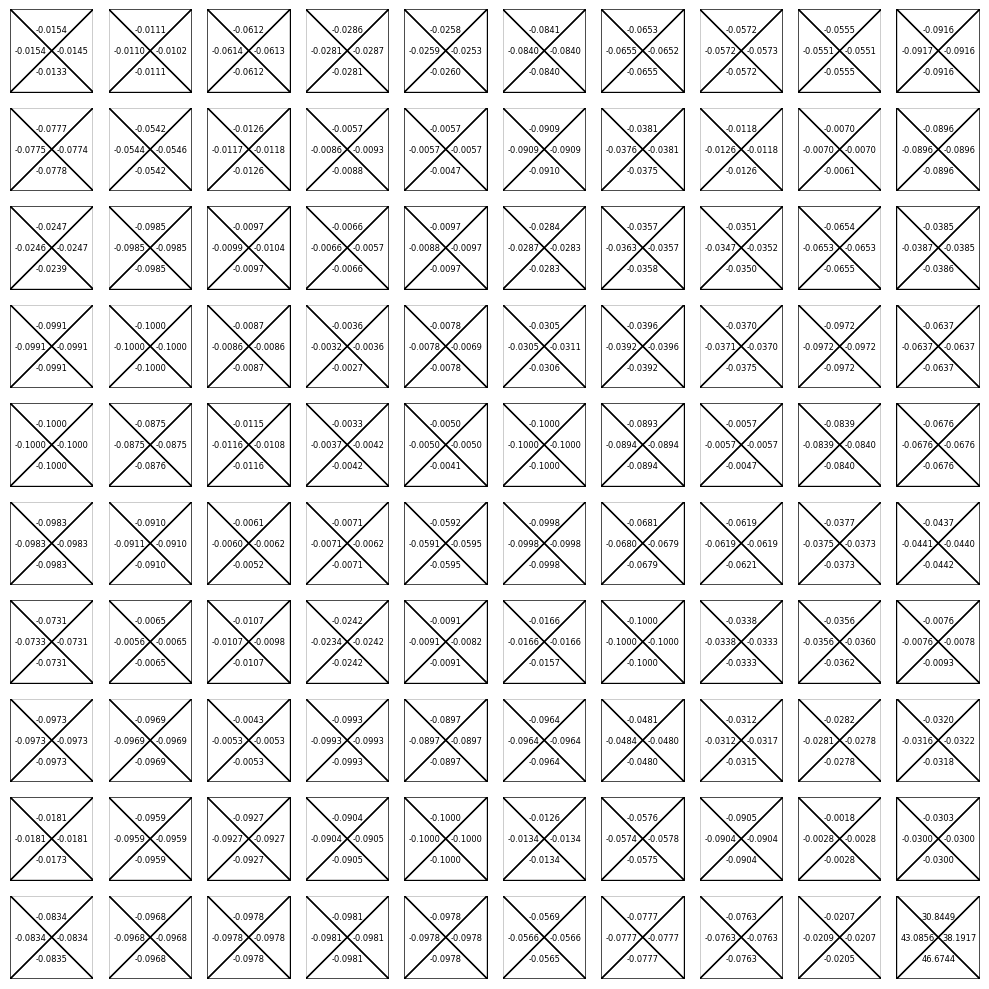

In [23]:
# show results
show_q_table(q_table)

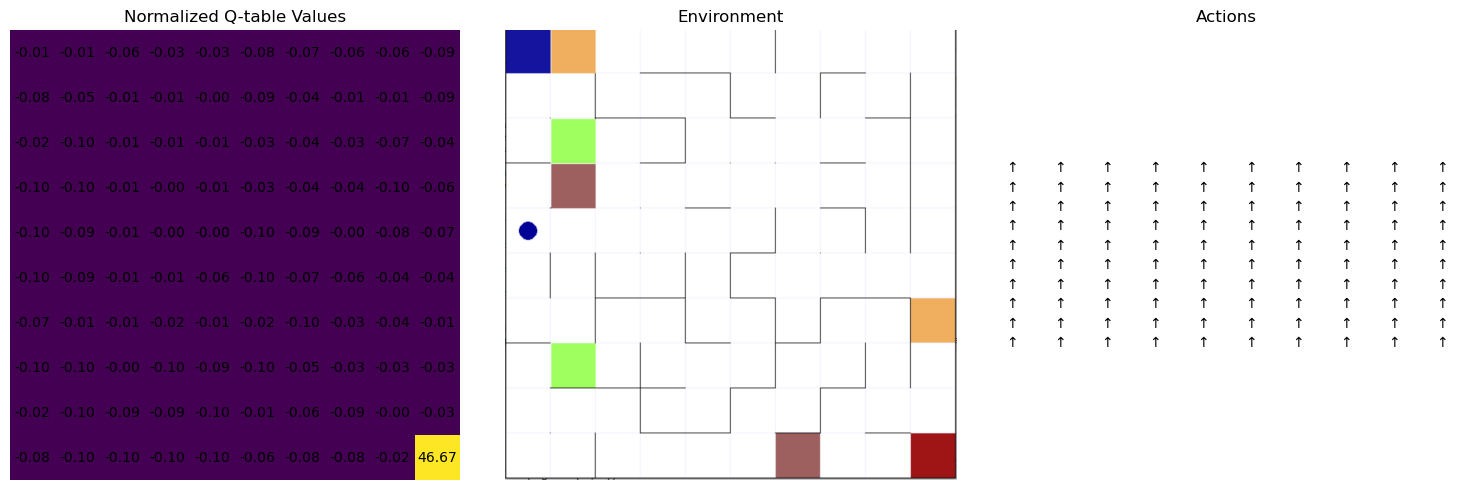

In [27]:
max_values = np.max(q_table, axis=2)
normalized_values = (max_values - np.min(max_values)) / (np.max(max_values) - np.min(max_values))


fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(normalized_values, cmap='viridis', interpolation='none')
axs[0].set_title('Normalized Q-table Values')
axs[0].axis('off')

for i in range(max_values.shape[0]):
    for j in range(max_values.shape[1]):
        axs[0].text(j, i, f'{max_values[i, j]:.2f}', ha='center', va='center', color='black')

show_actions(actions, axs[2])
axs[2].set_title('Actions')

image_path = 'env.PNG' 
img = mpimg.imread(image_path)
axs[1].imshow(img)
axs[1].set_title('Environment')
axs[1].axis('off')

plt.tight_layout()

plt.show()